In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Preprocessing
First read the housing price data set.

In [10]:
"""
dat = pd.read_csv('13_Tokyo_20053_20163.csv', sep=',', header=None, 
                 names=('id','type','chiiki','jiscode','ken','shi','chiku','eki','ekikyori',
                        'price','unit_price','madori','menseki','unit_price2','keijo',
                        'maguchi','nobeyuka','kenchikunen','kouzou','youto','mokuteki','dourohoui',
                        'dourotype','douro_fukuin','toshikeikaku','kenpeiritsu',
                        'yousekiritsu','torihiki_jiten','bikou'),
                 dtype={'id':np.int, 'type':np.str, 'chiiki':np.str, 'jiscode':np.str, 'ken':np.str, 'shi':np.str, 'chiku':np.str, 'eki':np.str,
                       'ekikyori':np.float32, 'price':np.float32, 'unit_price':np.float32, 'madori':np.str, 'menseki':np.float32, 'unit_price2':np.float32,
                       'keijo':np.str, 'maguchi':np.str, 'nobeyuka':np.float32, 'kenchikunen':np.str, 'kouzou':np.str, 'youto':np.str, 'mokuteki':np.str,
                       'dourohoui':np.str, 'dourotype':np.str, 'douro_fukuin':np.str, 'toshikeikaku':np.str, 'kenpeiritsu':np.float32, 
                       'yousekiritsu':np.float32, 'torihiki_jiten':np.str, 'bikou':np.str})
"""
dat = pd.read_csv('13_Tokyo_20053_20163.csv', sep=',', header=None, index_col='id',
                 names=('id','type','chiiki','jiscode','ken','shi','chiku','eki','ekikyori',
                        'price','unit_price','madori','menseki','unit_price2','keijo',
                        'maguchi','nobeyuka','kenchikunen','kouzou','youto','mokuteki','dourohoui',
                        'dourotype','douro_fukuin','toshikeikaku','kenpeiritsu',
                        'yousekiritsu','torihiki_jiten','bikou'),
                 dtype='object')

In [11]:
dat.head(3)

,type,chiiki,jiscode,ken,shi,chiku,eki,ekikyori,price,unit_price,...,youto,mokuteki,dourohoui,dourotype,douro_fukuin,toshikeikaku,kenpeiritsu,yousekiritsu,torihiki_jiten,bikou
id,,,,,,,,,,,,,,,,,,,,,
1,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,1,51000000,NaN,...,住宅,住宅,NaN,NaN,NaN,商業地域,80,600,平成28年第３四半期,未改装を購入
2,宅地(土地と建物),商業地,13101,東京都,千代田区,飯田橋,飯田橋,5,300000000,NaN,...,その他,住宅,北東,区道,5.0,商業地域,80,500,平成28年第１四半期,NaN
3,宅地(土地と建物),商業地,13101,東京都,千代田区,飯田橋,飯田橋,4,170000000,NaN,...,事務所、倉庫,住宅,北東,区道,4.0,商業地域,80,700,平成28年第１四半期,NaN


In [88]:
d = dat[(dat.type=='中古マンション等') & (dat.youto=='住宅')]
d.groupby('ekikyori')['type'].count()

ekikyori
0           1127
1           5273
10          6702
11          6257
12          3538
13          3999
14          3058
15          2917
16          2184
17           620
18          1419
19          1071
1H30?2H        8
1H?1H30       81
2           7886
20           818
21           575
22           172
23           576
24           389
25           372
26           243
27            59
28           223
29           204
2H?           16
3          11317
30分?60分     1075
4          12681
5          11617
6          13151
7           9143
8          10375
9           8970
Name: type, dtype: int64

# Converting each column into the right format
We read all the variables as 'object.' We convert some columns into values where appropriate.

'ekikyori' takes integer for most records, and we can see '1H30' and '30分'. We will convert to a value

In [89]:
d.loc[d.ekikyori=='30分?60分', 'ekikyori'] = '60'
d.loc[d.ekikyori=='2H?', 'ekikyori'] = '120'
d.loc[d.ekikyori=='1H30?2H', 'ekikyori'] = '120'
d.loc[d.ekikyori=='1H?1H30', 'ekikyori'] = '90'

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernela

In [103]:
d.ekikyori = pd.to_numeric(d.ekikyori)
d.menseki = pd.to_numeric(d.menseki)
d.kenpeiritsu = pd.to_numeric(d.kenpeiritsu)/100.0
d.yousekiritsu = pd.to_numeric(d.yousekiritsu)/100.0

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [92]:
d.price = pd.to_numeric(d.price)

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [105]:
d.iloc[:3, 25:30]

,yousekiritsu,torihiki_jiten,bikou
id,,,
1,600,平成28年第３四半期,未改装を購入
4,500,平成28年第１四半期,未改装を購入
5,700,平成28年第１四半期,未改装を購入


In [108]:
d.groupby('bikou')['type'].count()
# remove
# unit_price
# unit_price2
# keijo
# maguchi
# nobeyuka
# dourohoui
# dourotype
# douro_fukuin

bikou
その他事情有り                        1
他の権利・負担付き                      1
他の権利・負担付き、改装済を購入               4
他の権利・負担付き、未改装を購入              15
他の権利・負担付き、調停・競売等、未改装を購入        1
改装済を購入                     32550
改装済を購入、その他事情有り                 4
未改装を購入                     88887
未改装を購入、その他事情有り                22
瑕疵有りの可能性、改装済を購入                3
瑕疵有りの可能性、未改装を購入                6
調停・競売等                       457
調停・競売等、改装済を購入                101
調停・競売等、未改装を購入               2479
関係者間取引                        14
関係者間取引、改装済を購入                 31
関係者間取引、未改装を購入                191
Name: type, dtype: int64

From 'bikou' column, we can find if the apartment was reformed or not, the transaction between two professional dealers.

In [117]:
d['is_reformed'] = [1 if x in (['他の権利・負担付き、改装済を購入','改装済を購入','改装済を購入、その他事情有り',
                               '瑕疵有りの可能性、改装済を購入','調停・競売等、改装済を購入','関係者間取引、改装済を購入']) else 0 for x in d.bikou]
d['is_not_reformed'] = [1 if x in (['他の権利・負担付き、未改装を購入','他の権利・負担付き、調停・競売等、未改装を購入','未改装を購入',
                               '未改装を購入、その他事情有り','瑕疵有りの可能性、未改装を購入','調停・競売等、未改装を購入',
                                   '関係者間取引、未改装を購入']) else 0 for x in d.bikou]
d['is_auction'] = [1 if x in ['調停・競売等','調停・競売等、改装済を購入','調停・競売等、未改装を購入'] else 0 for x in d.bikou]
d['is_direct_transaction'] = [1 if x in ['関係者間取引','関係者間取引、改装済を購入','関係者間取引、未改装を購入'] else 0 for x in d.bikou]


//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

We need to convert 'torihiki_jiten' (transaction date) and 'kenchikunen' (year of built). These are denoted by gengou.

In [121]:
print(d.groupby('kenchikunen')['type'].count())

kenchikunen
平成10年    4510
平成11年    4523
平成12年    5419
平成13年    4607
平成14年    5124
平成15年    5874
平成16年    5733
平成17年    6856
平成18年    6592
平成19年    5593
平成20年    5138
平成21年    4469
平成22年    2840
平成23年    1867
平成24年    2009
平成25年    1290
平成26年    1110
平成27年    1091
平成28年     147
平成2年     2299
平成3年     2924
平成4年     2330
平成5年     1339
平成6年     1909
平成7年     3145
平成8年     3341
平成9年     3565
平成元年     2242
戦前        123
昭和21年       5
         ... 
昭和34年      14
昭和35年       4
昭和36年      10
昭和37年      10
昭和38年      26
昭和39年      63
昭和40年      76
昭和41年     146
昭和42年     170
昭和43年     474
昭和44年     690
昭和45年    1204
昭和46年    1495
昭和47年    1307
昭和48年    1323
昭和49年    1666
昭和50年     824
昭和51年    1002
昭和52年    1013
昭和53年    1734
昭和54年    1983
昭和55年    1805
昭和56年    1465
昭和57年    1692
昭和58年    1649
昭和59年    3426
昭和60年    2728
昭和61年    2221
昭和62年    2452
昭和63年    2665
Name: type, dtype: int64


We make a list of years manually.

In [122]:
gengou = []
gengou.append("戦前")
shouwa = range(21, 64)
for yr in shouwa:
    gengou.append("昭和"+np.str(yr)+"年")
# 平成元年
gengou.append("平成元年")
# 平成２年以降
heisei = range(2, 30)
for yr in heisei:
    gengou.append("平成"+np.str(yr)+"年")
seireki = range(1945, 2018) 
kenchikunen = {k: v for k, v in zip(gengou, seireki)}
# {平成２８年: 2016, 昭和５４年: 1979, ...}


We now change the kenchikunen in the data set. But kenchikunen has 3025 null values, so we need to delete those records.

In [134]:
d.isnull().sum()

type                          0
chiiki                   136394
jiscode                       0
ken                           0
shi                           0
chiku                        44
eki                         283
ekikyori                   8278
price                         0
unit_price               136394
madori                     4034
menseki                       0
unit_price2              136394
keijo                    136394
maguchi                  136394
nobeyuka                 136394
kenchikunen                3025
kouzou                     1033
youto                         0
mokuteki                 102656
dourohoui                136394
dourotype                136394
douro_fukuin             136394
toshikeikaku               2441
kenpeiritsu                2986
yousekiritsu               2986
torihiki_jiten                0
bikou                     11627
is_reformed                   0
is_not_reformed               0
is_auction                    0
is_direc

In [147]:
d['kenchiku_year'] = [np.nan if pd.isnull(y) else kenchikunen[y] for y in d.kenchikunen]
d[['kenchikunen', 'kenchiku_year']].head(5)

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,kenchikunen,kenchiku_year
id,,
1,昭和59年,1984.0
4,平成19年,2007.0
5,昭和57年,1982.0
6,平成19年,2007.0
10,平成11年,1999.0


From the kenchiku_year, we can calculate the age of the apartment as of the transaction date. The transaction quarter is available in the data set, so we take the difference between the two years.

In [155]:
d['transaction_year'] = [kenchikunen[v[:5]] for v in d.torihiki_jiten]
d[['torihiki_jiten', 'transaction_year']].head(5)
#for x in d.torihiki_jiten[:10]:
#    print(x[:5], kenchikunen[x[:5]])

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,torihiki_jiten,transaction_year
id,,
1,平成28年第３四半期,2016
4,平成28年第１四半期,2016
5,平成28年第１四半期,2016
6,平成28年第１四半期,2016
10,平成27年第４四半期,2015


In [162]:
d['age'] = np.maximum(d.transaction_year - d.kenchiku_year, 0)
print(d.age[:20])

id
1     32.0
4      9.0
5     34.0
6      9.0
10    16.0
11    31.0
12    33.0
13     8.0
14    31.0
16    31.0
17     8.0
18    30.0
19     NaN
20     2.0
21    31.0
22    11.0
23     7.0
24     7.0
25    11.0
26    30.0
Name: age, dtype: float64


//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


We now save the data set into pickle so we can re-start easily.

In [173]:
# remove useless columns
d.isnull().sum()/d.shape[0] # ratio of null values
# chiiki, unit_price, unit_price2, keijo, maguchi, nobeyuka, dourohoui, dourotype, douro_fukuin are all NaN
d = d.drop(['chiiki','unit_price','unit_price2','keijo','maguchi','nobeyuka','dourohoui','dourotype','douro_fukuin'], axis=1)

In [175]:
d.head(3)
# type is all apartment, and ken is Tokyo. so we remove these too.
d = d.drop(['type','ken'], axis=1)

We are going to use one year of records as the training data set, the next one quarter as the validation and the next one quarter as the test data set.

In [185]:
print(d.groupby('torihiki_jiten')['shi'].count())
train = d[d.torihiki_jiten.isin( ['平成27年第２四半期', '平成27年第３四半期','平成27年第４四半期','平成28年第１四半期'])]
validation = d[d.torihiki_jiten=='平成28年第２四半期']
test = d[d.torihiki_jiten=='平成28年第３四半期']
print(train.shape, validation.shape, test.shape)

torihiki_jiten
平成17年第３四半期    1882
平成17年第４四半期    1917
平成18年第１四半期    2204
平成18年第２四半期    1988
平成18年第３四半期    1979
平成18年第４四半期    2135
平成19年第１四半期    2397
平成19年第２四半期    2635
平成19年第３四半期    2464
平成19年第４四半期    2485
平成20年第１四半期    2667
平成20年第２四半期    2694
平成20年第３四半期    2629
平成20年第４四半期    2672
平成21年第１四半期    2807
平成21年第２四半期    2917
平成21年第３四半期    3120
平成21年第４四半期    3090
平成22年第１四半期    3278
平成22年第２四半期    3275
平成22年第３四半期    3405
平成22年第４四半期    3724
平成23年第１四半期    3592
平成23年第２四半期    2792
平成23年第３四半期    3007
平成23年第４四半期    2887
平成24年第１四半期    3232
平成24年第２四半期    3007
平成24年第３四半期    3020
平成24年第４四半期    3329
平成25年第１四半期    3764
平成25年第２四半期    3739
平成25年第３四半期    3572
平成25年第４四半期    3569
平成26年第１四半期    3721
平成26年第２四半期    3262
平成26年第３四半期    3341
平成26年第４四半期    3549
平成27年第１四半期    3786
平成27年第２四半期    3621
平成27年第３四半期    3657
平成27年第４四半期    3660
平成28年第１四半期    3795
平成28年第２四半期    3664
平成28年第３四半期    2464
Name: shi, dtype: int64
(14733, 24) (3664, 24) (2464, 24)


In [186]:
import pickle
pickle.dump(d, open('tokyo_apartment.p', 'wb'))
pickle.dump(train, open('tokyo_apartment_train.p', 'wb'))
pickle.dump(validation, open('tokyo_apartment_validation.p', 'wb'))
pickle.dump(test, open('tokyo_apartment_test.p', 'wb'))


In [187]:
d = pickle.load(open('tokyo_apartment.p', 'rb'))
train = pickle.load(open('tokyo_apartment_train.p', 'rb'))
validation = pickle.load(open('tokyo_apartment_validation.p', 'rb'))
test = pickle.load(open('tokyo_apartment_test.p', 'rb'))

## Visualise the data set
First, we visualise the training data set. This is to understand which factors are correlated with the price in what way, and to understand the distribution of the price and variables, which will help us decide whether we need to transform the variables.

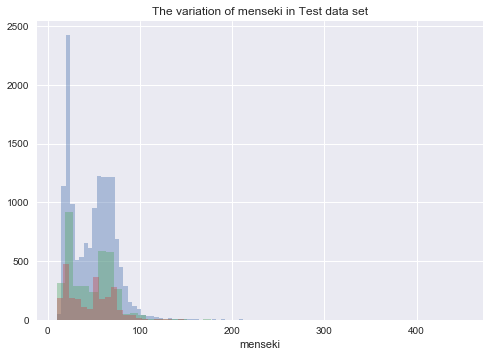

In [195]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(train.menseki, kde=False, rug=False)
sns.plt.title('The variation of menseki in Training data set')
sns.distplot(validation.menseki, kde=False, rug=False)
sns.plt.title('The variation of menseki in Validation data set')
sns.distplot(test.menseki, kde=False, rug=False)
sns.plt.title('The variation of menseki in Test data set')

We can observe a few outliers but menseki ranges between 0 and 400. We can check the min and maximum from tables below. The maximum is 450.

In [199]:
print('====training=====')
train.describe()


====training=====


,ekikyori,price,menseki,kenpeiritsu,is_reformed,is_not_reformed,is_auction,is_direct_transaction,kenchiku_year,transaction_year,age
count,14707.000000,1.473300e+04,14733.000000,14553.000000,14733.000000,14733.000000,14733.000000,14733.000000,14259.000000,14733.000000,14259.000000
mean,7.840076,3.290954e+07,47.836490,0.687741,0.231385,0.637820,0.011471,0.000950,1997.542535,2015.257585,17.715478
std,6.666850,4.058383e+07,24.650232,0.106461,0.421732,0.480647,0.106490,0.030812,12.003258,0.437319,12.004344
min,0.000000,2.400000e+05,10.000000,0.300000,0.000000,0.000000,0.000000,0.000000,1945.000000,2015.000000,0.000000
25%,4.000000,1.800000e+07,25.000000,0.600000,0.000000,0.000000,0.000000,0.000000,1989.000000,2015.000000,9.000000
50%,7.000000,2.600000e+07,50.000000,0.600000,0.000000,1.000000,0.000000,0.000000,2000.000000,2015.000000,15.000000
75%,10.000000,4.000000e+07,65.000000,0.800000,0.000000,1.000000,0.000000,0.000000,2006.000000,2016.000000,26.000000
max,120.000000,3.200000e+09,250.000000,0.800000,1.000000,1.000000,1.000000,1.000000,2016.000000,2016.000000,70.000000


In [202]:
print('====validation=====')
validation.describe()


====validation=====


,ekikyori,price,menseki,kenpeiritsu,is_reformed,is_not_reformed,is_auction,is_direct_transaction,kenchiku_year,transaction_year,age
count,3653.000000,3.664000e+03,3664.000000,3649.000000,3664.000000,3664.000000,3664.000000,3664.000000,3561.000000,3664.0,3561.000000
mean,7.694498,3.250172e+07,46.446507,0.690025,0.222162,0.654749,0.008461,0.001365,1997.863521,2016.0,18.136479
std,7.002993,2.772296e+07,25.221289,0.105362,0.415756,0.475515,0.091605,0.036921,12.177591,0.0,12.177591
min,0.000000,1.000000e+06,10.000000,0.300000,0.000000,0.000000,0.000000,0.000000,1950.000000,2016.0,0.000000
25%,4.000000,1.800000e+07,20.000000,0.600000,0.000000,0.000000,0.000000,0.000000,1989.000000,2016.0,9.000000
50%,6.000000,2.600000e+07,50.000000,0.600000,0.000000,1.000000,0.000000,0.000000,2001.000000,2016.0,15.000000
75%,10.000000,4.000000e+07,65.000000,0.800000,0.000000,1.000000,0.000000,0.000000,2007.000000,2016.0,27.000000
max,120.000000,7.500000e+08,450.000000,0.800000,1.000000,1.000000,1.000000,1.000000,2016.000000,2016.0,66.000000


In [203]:
print('====testing=====')
test.describe()

====testing=====


,ekikyori,price,menseki,kenpeiritsu,is_reformed,is_not_reformed,is_auction,is_direct_transaction,kenchiku_year,transaction_year,age
count,2458.000000,2.464000e+03,2464.000000,2437.000000,2464.000000,2464.000000,2464.000000,2464.000000,2381.000000,2464.0,2381.000000
mean,7.442229,3.319420e+07,45.996347,0.690439,0.231737,0.637175,0.010552,0.000812,1998.078118,2016.0,17.921882
std,6.231404,2.493126e+07,24.115106,0.106534,0.422028,0.480912,0.102200,0.028484,12.086131,0.0,12.086131
min,0.000000,8.200000e+05,10.000000,0.400000,0.000000,0.000000,0.000000,0.000000,1945.000000,2016.0,0.000000
25%,4.000000,1.900000e+07,20.000000,0.600000,0.000000,0.000000,0.000000,0.000000,1990.000000,2016.0,9.000000
50%,6.000000,2.600000e+07,45.000000,0.600000,0.000000,1.000000,0.000000,0.000000,2001.000000,2016.0,15.000000
75%,9.000000,4.100000e+07,65.000000,0.800000,0.000000,1.000000,0.000000,0.000000,2007.000000,2016.0,26.000000
max,60.000000,3.300000e+08,200.000000,0.800000,1.000000,1.000000,1.000000,1.000000,2016.000000,2016.0,71.000000
